In [1]:
import numpy as np

corpus = "i love deep learning and neural network. I would like to work on deep learning to understand it from depth. I believe I would need to learn statistics first."
# corpus = "i love deep learning and AI. I want to work on deep learning."
# with open('dataset/tiny_shakespeare.txt', 'r') as f:
#     corpus = f.read()
tokens = corpus.lower().split()


In [2]:
def dedup_list(seq):
    seen = set()
    return [x for x in seq if not (x in seen or seen.add(x))]

vocab = dedup_list(tokens)
stoi = {w:i for i,w in enumerate(vocab)}
itos = {i:w for w,i in stoi.items()}
len(vocab)

21

In [3]:
def generate_training_data(tokens, window_size=2):
    training_data = []
    for centre_idx, centre_word in enumerate(tokens):
        for context_idx in range(-window_size, window_size + 1):
            idx = centre_idx + context_idx
            if idx < 0 or idx >= len(tokens) or context_idx == 0:
                continue
            training_data.append((centre_word, tokens[idx]))
    return training_data

training_data = generate_training_data(vocab, window_size=2)

In [4]:
vocab_size = len(vocab)
def one_hot_encoding(word):
    vec = np.zeros(vocab_size)
    vec[stoi[word]] = 1
    return vec

In [12]:
embedding_dim = 100
W1 = np.random.randn(vocab_size, embedding_dim) * 0.01
W2 = np.random.randn(embedding_dim, vocab_size) * 0.01


In [13]:
def softmax(x):
    ex = np.exp(x - np.max(x))
    return ex / ex.sum(axis=0)

In [14]:
def train(training_data, epochs=10000, learning_rate=0.01):
    global W1, W2
    for epoch in range(epochs):
        loss = 0.0
        for center_word, context_word in training_data:
            x = one_hot_encoding(center_word).reshape(-1, 1)
            y_true = one_hot_encoding(context_word).reshape(-1, 1)
            #forward pass
            h = W1.T @ x
            logits = W2.T @ h
            y_pred = softmax(logits)

            loss -= np.sum(y_true * np.log(y_pred))
            #backward pass
            e = y_pred - y_true
            dW2 = np.dot(h, e.T)
            dW1 = np.dot(x, np.dot(W2, e).T)

            # Update weights
            W1 -= learning_rate * dW1
            W2 -= learning_rate * dW2
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

train(training_data, epochs=10000, learning_rate=0.01)

Epoch 0, Loss: 237.4565
Epoch 100, Loss: 208.0923
Epoch 200, Loss: 120.1197
Epoch 300, Loss: 111.0505
Epoch 400, Loss: 109.3338
Epoch 500, Loss: 108.7706
Epoch 600, Loss: 108.5500
Epoch 700, Loss: 108.4557
Epoch 800, Loss: 108.4143
Epoch 900, Loss: 108.3969
Epoch 1000, Loss: 108.3907
Epoch 1100, Loss: 108.3896
Epoch 1200, Loss: 108.3906
Epoch 1300, Loss: 108.3923
Epoch 1400, Loss: 108.3939
Epoch 1500, Loss: 108.3950
Epoch 1600, Loss: 108.3956
Epoch 1700, Loss: 108.3955
Epoch 1800, Loss: 108.3948
Epoch 1900, Loss: 108.3936
Epoch 2000, Loss: 108.3919
Epoch 2100, Loss: 108.3898
Epoch 2200, Loss: 108.3874
Epoch 2300, Loss: 108.3847
Epoch 2400, Loss: 108.3818
Epoch 2500, Loss: 108.3787
Epoch 2600, Loss: 108.3754
Epoch 2700, Loss: 108.3721
Epoch 2800, Loss: 108.3687
Epoch 2900, Loss: 108.3653
Epoch 3000, Loss: 108.3619
Epoch 3100, Loss: 108.3585
Epoch 3200, Loss: 108.3551
Epoch 3300, Loss: 108.3517
Epoch 3400, Loss: 108.3484
Epoch 3500, Loss: 108.3452
Epoch 3600, Loss: 108.3419
Epoch 3700, L

In [15]:
def get_embedding(word):
    return W1[stoi[word]]

word = 'deep'
print(f"Embedding for '{word}':", get_embedding(word))

Embedding for 'deep': [-0.09267586 -0.03753642 -0.27798085  0.17707697 -0.36306998 -0.05185448
 -0.24276702  0.62607004  0.25283499 -0.29358834  0.10388108 -0.10541186
 -0.02248193 -0.15757728  0.30729681  0.17144742 -0.28915948  0.09206017
 -0.15173014  0.05694358  0.33877212 -0.04904505 -0.05480217  0.25045187
  0.09047451 -0.4178161  -0.2221802   0.10453341 -0.01854626  0.29304237
 -0.25993302  0.07715942  0.12958192 -0.19237087 -0.39760343 -0.09048662
  0.01676847 -0.41624982  0.37715468  0.08211014 -0.29173465 -0.29654389
  0.02171255 -0.54434019 -0.10132175 -0.41126902  0.31649874  0.0622804
  0.14524727 -0.21436143  0.13560741 -0.13709572 -0.25191026  0.22948013
  0.19281697 -0.16893263 -0.22524439 -0.49013034 -0.67329618  0.62407462
  0.47451854  0.01472979 -0.292795    0.38586659 -0.13363788 -0.34673489
  0.23137229  0.08783642  0.05906903 -0.10859829 -0.34893338 -0.28363795
  0.10310162  0.0334758   0.01024513  0.07687904  0.53426738 -0.14483055
 -0.2416476   0.04355627  0.09

In [16]:
embeddings = W1
labels = [itos[i] for i in range(vocab_size)]


/Users/subhojit/workspace/saturn/.venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


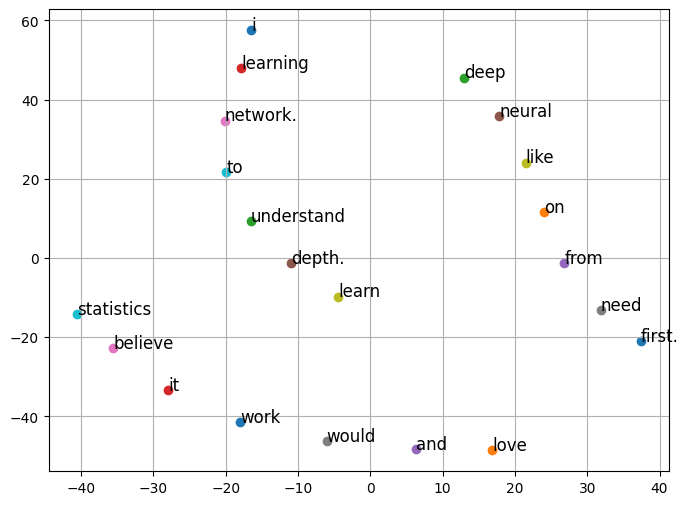

In [17]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

#Visualization with t-SNE
def visualize_embeddings(embeddings, labels):
    tsne = TSNE(n_components=2, random_state=42, perplexity=5, n_iter=1000)
    reduced = tsne.fit_transform(embeddings)

    plt.figure(figsize=(8, 6))
    for i, label in enumerate(labels):
        x, y = reduced[i, :]
        plt.scatter(x, y)
        plt.annotate(label, (x + 0.01, y + 0.01), fontsize=12)
    plt.grid(True)
    plt.show()

visualize_embeddings(embeddings, labels)
